# Predicting heart disease using machine learning. CHANGE TITLE TO SOMETHING BETTER?!?!?!?!

This notebook looks into using various Python machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on attributes of the medical history using binary classification.

I am using the following workflow:

[<img src='images/6-step-ml-framework.png'/>](https://academy.zerotomastery.io/p/complete-machine-learning-and-data-science-bootcamp-zero-to-mastery)

## 1. Problem definition.

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data.

The data being used in this investigation comes from the Cleveland database provided by the University of California, Irvine [(UCI Machine Learning Repository: Heart Disease Data Set, 1988)](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). Kaggle also provides this [data](https://www.kaggle.com/ronitf/heart-disease-uci).

## 3. Evaluation.

Definition of success:
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we will pursue the project.

## 4. Features.

Below is a description of the attributes of the dataset to be investigated.

**Data dictionary:**

1. `age`: Age in years.


2. `sex`:
    * 0: Female. 
    * 1: Male.
    
    
3. `cp`: Chest pain type.
    * 1: Typical angina (chest pain is related to decreased blood supply to the heart).
    * 2: Atypical angina (chest pain is not related to the heart).
    * 3: Non-anginal pain (typically non-heart related esophageal spasms).
    * 4: Asymptomatic (chest pain not showing signs of disease).


4. `trestbps`: Resting blood pressure (in mm Hg on admission to the hospital). Anything above 130-140 is a cause for concern.


5. `chol`: Serum cholestoral in mg/dl.
    * $\text{Serum} = \text{LDL} + \text{HDL} + 0.2 \times \text{triglycerides}$
    * `chol` > 200 is a cause for concern.


6. `fbs`: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
    * `fbs` > 126 mg/dl indicates diabetes.


7. `restecg`: Resting electrocardiographic results.
    * 0: Nothing anomalous.
    * 1: ST-T wave abnormality
        * Can range from mild symptoms to severe problems.
        * Indicates an abnormal heart beat.
    * 2: Possible or definite left ventricular hypertrophy.
        * Enlarged heart's main pumping chamber.


8. `thalach`: Maximum heart rate achieved.


9. `exang`: Exercise induced angina.
    * 1: Yes.
    * 0: No.


10. `oldpeak`: ST depression induced by exercise relative to rest.


11. `slope`: Slope of the peak exercise ST segment.
    * 0: Upsloping (better heart rate with exercise - uncommon).
    * 1: Flatsloping (minimal change - typical for healthy hearts).
    * 2: Downsloping (signals an unhealthy heart).    


12. `ca`: Number of major vessels (0-3) colored by flourosopy
    * Coloured vessels indicates doctor can see blood passing through.
    * The more blood movement, the better as this indicates no internal blood coagulation.


13. `thal`: Thalium stress result.
    * 1-3: Normal
    * 6: Fixed defect (used to be a defect but is ok now).
    * 7: Reversable defect (no proper blood movement when exercising).


14. `target`: Whether patient has heart disease:
    * 0: Heart disease absent.
    * 1: Heart disease present.

### Preparing the tools.

I will use `pandas`, `matplotlib` and `numpy` for data analysis and manipulation and `sklearn` for modelling.

In [1]:
# Importing all the tools to use.

# Regular EDA (exploratory data analysis) and plotting libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Allows plots to render within this notebook.
%matplotlib inline

# Models from Scikit-Learn.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation tools and classification-specific metric functions.
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Exploratory Data Analysis.

Here I am exploring the data to become a subject matter expert on the heart disease. In particular, I am looking out for:
1. What question(s) am I trying to solve?
2. What kind of data is in the heart disease data set and how should I handle different types?
3. What is missing from the dataset and how should I deal with each case?
4. (If any) Where are the outliers within this dataset and should I accomodate for them and why?
5. Is there any features I can add, change or remove to get more out of this dataset?

In [2]:
df = pd.read_csv('data/heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Viewing the frequency of heart disease or no heart disease in this data.
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

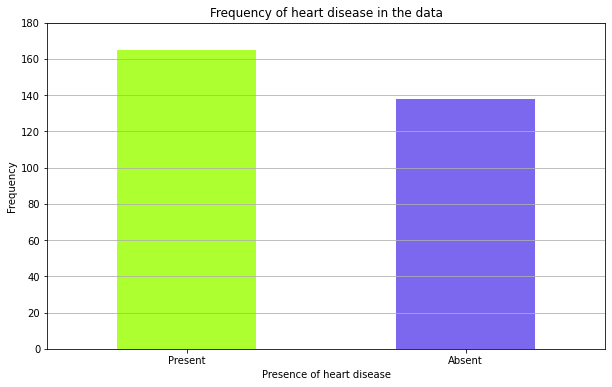

In [4]:
colors = ['greenyellow', 'mediumslateblue']
df['target'].value_counts().plot.bar(color=colors, 
                                     figsize=(10, 6))

# Customising the plot for better comprehension.
plt.title('Frequency of heart disease in the data')
plt.xlabel('Presence of heart disease')
plt.ylabel('Frequency')
plt.ylim(top=180)
plt.xticks(ticks=[0, 1], labels=['Present', 'Absent'], rotation=0)
plt.grid(axis='y')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Checking for missing values in the dataset
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The dataset is fully populated so we can skip the step of filling in the values.

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


First, let's compare each feature against the target to find any correlation between them.

#### (i) Heart disease frequency according to sex.

In [8]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

There is significantly more men than women in this dataset.

In [9]:
# Comparing the target column with the sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


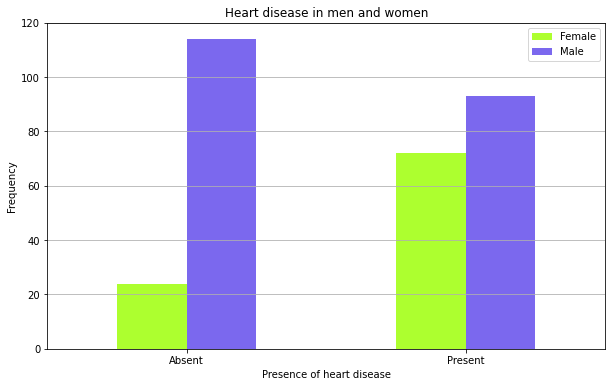

In [10]:
# Visualising this data.
pd.crosstab(df.target, df.sex).plot.bar(color=colors, 
                                        figsize=(10, 6))

# Customising the plot.
plt.title('Heart disease in men and women')
plt.xlabel('Presence of heart disease')
plt.xticks(ticks=[0, 1], labels=['Absent', 'Present'], rotation=0)
plt.ylabel('Frequency')
plt.ylim(top=120)
plt.legend(['Female', 'Male'])
plt.grid(axis='y')

#### (ii) Heart disease frequency according to age vs. maximum heart rate. 

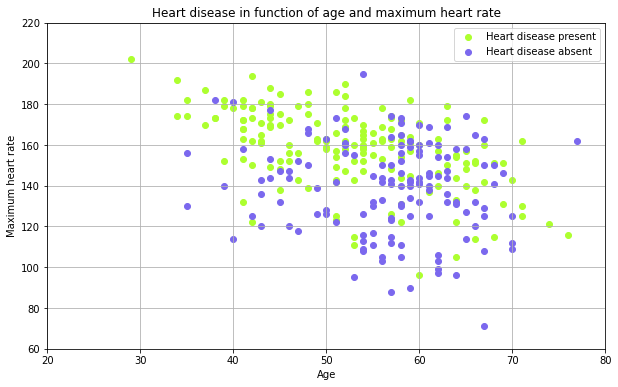

In [11]:
# Creating a scatter graph for heart disease positive patients.
plt.figure(figsize=(10, 6))
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c='greenyellow')

# Scatter with negative examples.
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c='mediumslateblue')

plt.title('Heart disease in function of age and maximum heart rate')
plt.xlabel('Age')
plt.xlim(20, 80)
plt.ylabel('Maximum heart rate')
plt.ylim(60, 220)
plt.legend(['Heart disease present', 'Heart disease absent'])
plt.grid()

We can see that, generally, as a patient gets older, the lower their maximum heart rate.

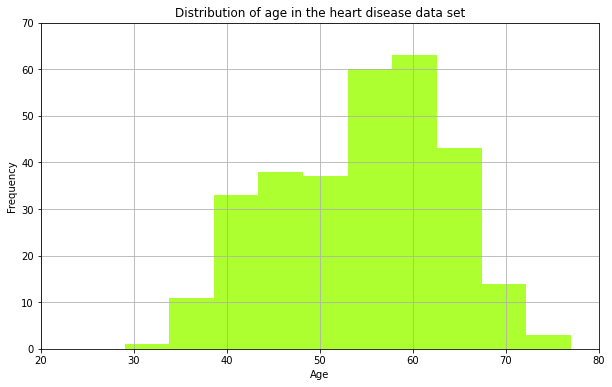

In [12]:
# Check the distribution of the age column with a histogram.
df.age.plot.hist(color='greenyellow', 
                 figsize=(10, 6))

plt.title('Distribution of age in the heart disease data set')
plt.xlabel('Age')
plt.xlim(20, 80)
plt.ylim(top=70)
plt.grid()

#### (iii) Heart disease frequency according to chest pain type.

`cp`: Chest pain type.
* 1: Typical angina (chest pain is related to decreased blood supply to the heart).
* 2: Atypical angina (chest pain is not related to the heart).
* 3: Non-anginal pain (typically non-heart related esophageal spasms).
* 4: Asymptomatic (chest pain not showing signs of disease).

In [13]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


The classes of chest pain in the data set differs to the chest pain types I defined above because the data that was read into the pandas DataFrame enumerates `cp` 

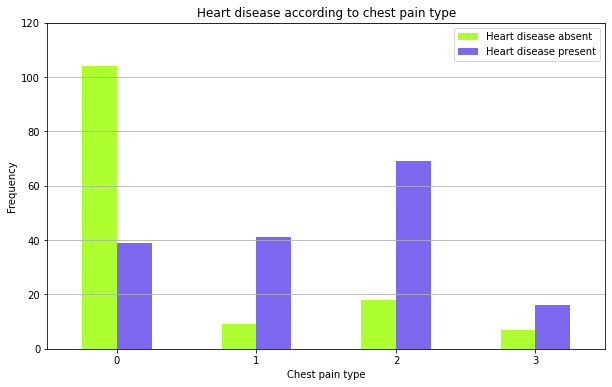

In [14]:
# Visualising and comparing chest pain type to the target as a bar chart.
pd.crosstab(df.cp, df.target).plot.bar(color=colors,
                                       figsize=(10, 6))

# Customising the plot.
plt.title('Heart disease according to chest pain type')
plt.xlabel('Chest pain type')
plt.ylabel('Frequency')
plt.ylim(top=120)
plt.legend(['Heart disease absent', 'Heart disease present'])
plt.xticks(rotation=0)
plt.grid(axis='y')

In [15]:
### Using a correlation matrix

In [16]:
# I want to compare all columns pairwise to each other.
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


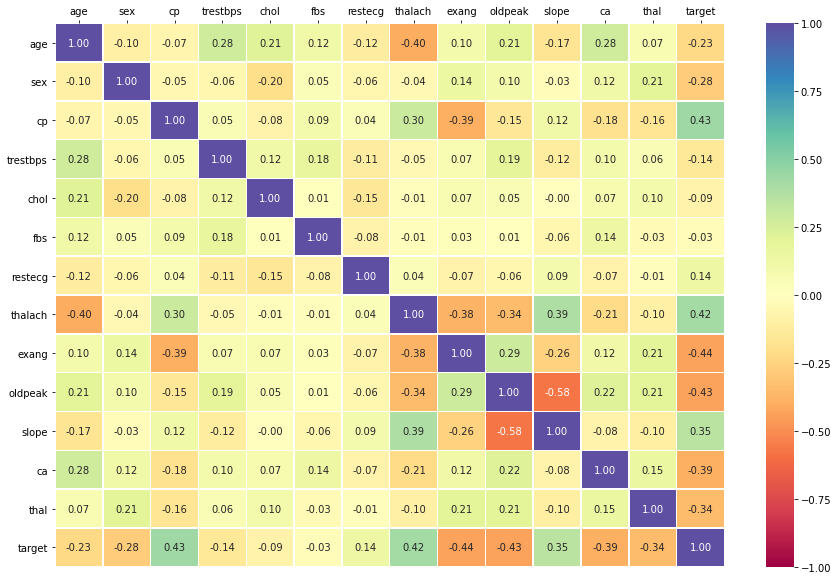

In [17]:
# Visualising the correlation matrix using Seaborn's heatmap() to better comprehend it.
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 vmin=-1, # Sets colour range minimum to minimum correlation
                 vmax=1, # Sets colour range maximum to maximum correlation
                 annot=True,
                 linewidth=0.5,
                 fmt='.2f',
                 cmap='Spectral')
ax.xaxis.set_ticks_position('top')

Higher (positive) values (colder colours) indicates a stronger positive correlation between the two clinical parameters i.e. as one parameter increases, the other parameter increases too.

Lower (negative) values (hotter colours) indicates a stronger negative correlation between the two clinical parameters i.e as one parameter increases, the other parameter decreases.

We can make some inferences from the correlation matrix heatmap:

* `cp` is moderately positively correlated with `target` which suggests that having a higher type chest pain increases a patient's probability of having heart disease. This is in agreement with the bar graph plotted above because the graph shows that the ratio between the presence and absence of heart disease increases as chest pain type increases.


* `thalach` is moderately positively correlated with `target` which suggests that having a higher maximum heart rate increases a patient's probability of having heart disease.


* `exang` is moderately negatively correlated with `target` which strangely suggests that getting chest pain during exercise decreases a patient's probability of having heart disease. Perhaps we do not have enough data or maybe we need to apply feature engineering to the `exang` column.

## 5. Modelling

In [18]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [19]:
# First split the data into feature matrix X of clinical parameters and label vector y of targets.
X = df.drop('target', axis=1)
y = df['target']

In [20]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

Since target's values only consist of two classes (0 or 1), we are looking at a binary classification problem.

In [22]:
# Setting random seed for reproducible results.
np.random.seed(42)

# Split the feature matrix and label vector into mutually exclusive training:test sets in the ratio 80:20.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [24]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Now that I have split the data into a feature matrix and label vector and these into training and test sets, I can build a machine learning model. I will train the model on the training data and test it on the test data.

After referring to the [Scikit-Learn Machine Learning Map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), I will try these three estimators on the heart disease data set:
1. [Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression).
2. [K-Neighbors Classifier](https://scikit-learn.org/stable/modules/neighbors.html#classification).
3. [Ensemble Classifiers](https://scikit-learn.org/stable/modules/ensemble.html#forest).

In [25]:
# Instantiate all the models into a dictionary.
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest Classifier': RandomForestClassifier()
}

# Create function that fits and scores models.
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and scores the given machine learning models.
    
    Parameters
    ----------
    models : dict
        A dict of Scikit-Learn machine learning models.
    
    X_train : pandas.core.frame.DataFrame
        Training data (no labels).
    
    X_test : pandas.core.frame.DataFrame
        Test data (no labels)
    
    y_train : pandas.core.series.Series
        Training labels
        
    y_test : pandas.core.series.Series
        Test labels
    '''
    
    # Setting a random seed for reproducible results.
    np.random.seed(42)
    
    # Create a dictionary to store each model's score.
    model_scores = {}
    
    # Loop through models and fit and score each model on the training and test data given.
    for name, model in models.items():
        # Fit the model on the training data.
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [26]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

/Users/pamel/Documents/idk/ml_ds_course/heart-disease-project/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

### Model Comparison

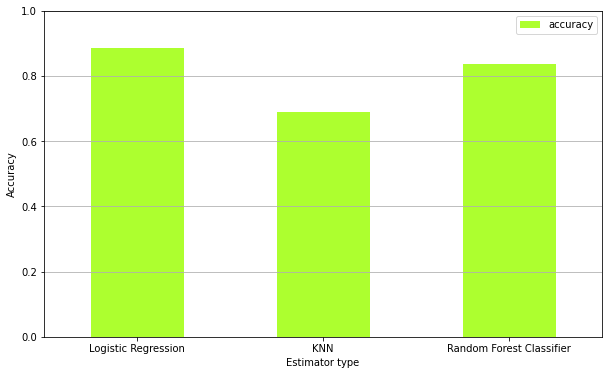

In [27]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar(color='greenyellow', 
                         figsize=(10, 6))
plt.xlabel('Estimator type')
plt.xticks(rotation=0)
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y')

I have decent baseline models, however I can improve the accuracy of these models.

* Hyperparameter tuning.
* Feature importance.
* Confusion matrix.
* Cross-validation.
* Precision.
* Recall.
* F1 score.
* Classification report.
* ROC curve.
* Area under the curve (AUC).

### Hyperparameter tuning.

In [28]:
# Tuning the hyperparameters of the KNN.

train_scores = []
test_scores = []

# Create a list of values for n_neighbors.
neighbors = range(1, 21)

# Set up a KNN instance.
knn = KNeighborsClassifier()

# Loop through neighbors to test 20 versions of the KNN varying the number of neighbours k and fit and score each 
# version of the model on the training and test data.
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # Fit this model on the training data.
    knn.fit(X_train, y_train)
    # Update the train_scores list with the score of the KNN on the training data.
    train_scores.append(knn.score(X_train, y_train))
    # Update the test_scores list with the score of the KNN on the test data.
    test_scores.append(knn.score(X_test, y_test))

In [29]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [30]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41% using an 11-neighbor classifier.
This is an improvement from the baseline KNN above which had an accuracy of 68.85% for the default 5-neighbour classifier.


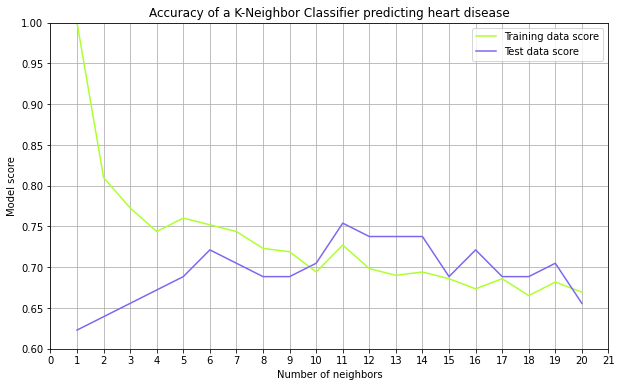

In [31]:
# Visualisation of the accuracies of each K-Neighbour Classifier.
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(neighbors, train_scores, label='Training data score', color='greenyellow')
ax.plot(neighbors, test_scores, label='Test data score', color='mediumslateblue')
ax.set_title('Accuracy of a K-Neighbor Classifier predicting heart disease')
ax.set_xlabel('Number of neighbors')
ax.xaxis.set_ticks(np.arange(0, 22, 1))
ax.set_ylabel('Model score')
ax.set_ylim(0.6, 1)
ax.legend()
ax.grid()

baseline_knn = models['KNN']
baseline_knn_accuracy = model_scores['KNN']
print(f'Maximum KNN score on the test data: {max(test_scores) * 100:.2f}% using an {test_scores.index(max(test_scores)) + 1}-neighbor classifier.')
print(f'This is an improvement from the baseline KNN above which had an accuracy of {baseline_knn_accuracy * 100:.2f}% for the default {baseline_knn.n_neighbors}-neighbour classifier.')

The baseline accuracy of the KNN was 68.85% and after attempting to tune the `n_neighbors` hyperparameter, I only managed to get the accuracy up to 75.41% which is still significantly lower than the accuracies of the baseline logistic regression model (88.52%) and the baseline Random Forest Classifier model (83.61%). Therefore, I will discard the K-Neighbour Classifier model and continue to work with the other two models.

### Hyperparameter tuning using [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-search).

Tuning the hyperparameters of ...

* `LogisticRegression()`
* `RandomForestClassifier()`

... using `RandomizedSearchCV`.

In [32]:
# Create a hyperparameter grid for the Logistic Regression model.
log_reg_grid = {
    'C': np.logspace(-4, 4, 20), # Regularization strength - np.logspace() returns numbers spaced evenly on a log scale.
    'solver': ['liblinear'] # Algorithm to use in optimisation problem.
}

# Create a hyperparameter grid for the Random Forest Classifier.
rf_grid = {
    'n_estimators': np.arange(10, 1000, 50), 
    'max_depth': [None, 3, 5, 10], 
    'min_samples_split': np.arange(2, 20, 2), 
    'min_samples_leaf': np.arange(1, 20, 2)
}

Now that the hyperparameter grids have been set up for each model, I can tune them using `RandomizedSearchCV`.

#### Hyperparameter tuning the `LogisticRegression()` model using `RandomizedSearchCV`.

In [33]:
# Setting up a random seed for reproducible results.
np.random.seed(42)

# Set up a randomized hyperparameter search for Logistic Regression.
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5, # 5-fold cross validation.
                                n_iter=20, # Test 20 models with attributes randomly selected from param_distributions.
                                verbose=True)

# Fit the randomized hyperparameter model for Logistic Regression.
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [34]:
# Viewing the best hyperparameter combination.
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [35]:
# Checking the accuracy of the model (which by default uses the best hyperparameter combination).
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [36]:
baseline_lr = models['Logistic Regression']
baseline_lr_accuracy = model_scores['Logistic Regression']
print(f'Logistic regression model\'s score (using the best hyperparameters found via RandomizedSearchCV) on the test data: {rs_log_reg.score(X_test, y_test) * 100:.2f}% using the tuned hyperparameters {rs_log_reg.best_params_}')
print(f'This is the same score achieved by the baseline logistic regression model above which also had an accuracy of {baseline_lr_accuracy * 100:.2f}% using the default hyperparameters.')

Logistic regression model's score (using the best hyperparameters found via RandomizedSearchCV) on the test data: 88.52% using the tuned hyperparameters {'solver': 'liblinear', 'C': 0.23357214690901212}
This is the same score achieved by the baseline logistic regression model above which also had an accuracy of 88.52% using the default hyperparameters.


Oddly enough, it seems that even with the best hyperparameters, this hyperparameter tuned logistic regression model still achieves the same accuracy as without the tuning.

#### Hyperparameter tuning the `RandomForestClassifier` model using `RandomizedSearchCV`.

In [37]:
# Setting up a random seed for reproducible results.
np.random.seed(42)

# Set up a randomized hyperparameter search for Random Forest Classifier.
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid, 
                           cv=5, # 5-fold cross validation.
                           n_iter=20, # Test 20 models with attributes randomly selected from param_distributions.
                           verbose=True)

# Fit the randomized hyperparameter model for Random Forest Classifier.
rs_rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [38]:
# Viewing the best hyperparameter combination.
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [39]:
# Checking the accuracy of the model (which by default uses the best hyperparameter combination).
rs_rf.score(X_test, y_test)

0.8688524590163934

In [40]:
baseline_rf = models['Random Forest Classifier']
baseline_rf_accuracy = model_scores['Random Forest Classifier']
print(f'Random forest classifier model\'s score (using the best hyperparameters) on the test data: {rs_rf.score(X_test, y_test) * 100:.2f}% using the tuned hyperparameters {rs_rf.best_params_}')
print(f'This is higher than the score achieved by the baseline random forest classifier model above which had an accuracy of {baseline_rf_accuracy * 100:.2f}% using the default hyperparameters.')

Random forest classifier model's score (using the best hyperparameters) on the test data: 86.89% using the tuned hyperparameters {'n_estimators': 210, 'min_samples_split': 4, 'min_samples_leaf': 19, 'max_depth': 3}
This is higher than the score achieved by the baseline random forest classifier model above which had an accuracy of 83.61% using the default hyperparameters.


The accuracy of the random forest classifier is still less than that of the logisic regression model. Since the logistic regression model is providing the best scores so far, doing a more thorough search for the best hyperparameters should be the next step in attempting to achieve 95% accuracy with this model.

`GridSearchCV` can facilitate this by fitting and scoring all possible hyperparameter combinations (provided by a parameter grid).

### Hyperparameter tuning using [`GridSearchCV`](https://scikit-learn.org/stable/modules/grid_search.html#grid-search).

In [41]:
# Create a hyperparameter grid for the Logistic Regression model.
log_reg_grid = {
    'C': np.logspace(-4, 4, 30), # Regularization strength.
    'solver': ['liblinear'] # Algorithm to use in optimisation problem.
}

# Setting up a random seed for reproducible results.
np.random.seed(42)

# Set up a grid hyperparameter search for Logistic Regression.
gs_log_reg = GridSearchCV(LogisticRegression(), 
                          param_grid=log_reg_grid, 
                          cv=5, # 5-fold cross validation.
                          verbose=True)

# Fit the grid search hyperparameter model for Logistic Regression.
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [42]:
# Viewing the best hyperparameter combination.
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [43]:
# Checking the accuracy of the model (which by default uses the best hyperparameter combination).
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [44]:
print(f'Logistic regression model\'s score (using the best hyperparameters found via GridSearchCV) on the test data: {gs_log_reg.score(X_test, y_test) * 100:.2f}% using the tuned hyperparameters {gs_log_reg.best_params_}')
print(f'This is still the same score achieved by the baseline logistic regression model above which also had an accuracy of {baseline_lr_accuracy * 100:.2f}% using the default hyperparameters.')

Logistic regression model's score (using the best hyperparameters found via GridSearchCV) on the test data: 88.52% using the tuned hyperparameters {'C': 0.20433597178569418, 'solver': 'liblinear'}
This is still the same score achieved by the baseline logistic regression model above which also had an accuracy of 88.52% using the default hyperparameters.


### Evaluating the tuned machine learning classifier currently, beyond accuracy.

Let's observe the following evaluation metrics (using cross-validation where possible):
* ROC curve and AUC score.
* Confusion matrix.
* Classification report.
* Precision.
* Recall.
* F1-score.

In [45]:
# First we need to make some predictions on the test data with the current model.
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [46]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

#### ROC curve and AUC score.

There are two key components for this metric:

* Receiver Operating Characteristic (ROC) curve.
* Area under (ROC) curve (AUC).

ROC curves are a comparison of a model's **True Positive Rate** (**TPR**) versus a model's **False Positive Rate** (**FPR**).

* **True positive** occurs when model predicts 1 when truth is 1.
* **False positive** occurs when model predicts 1 when truth is 0.
* **True negative** occurs when model predicts 0 when truth is 0.
* **False negative** occurs when model predicts 0 when truth is 1.

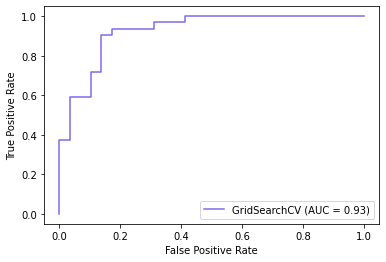

In [47]:
# Plot ROC curve and calculate AUC metric.
plot_roc_curve(gs_log_reg, 
               X_test, 
               y_test, 
               color='mediumslateblue');

The logistic regression model has an area of 0.93 under the curve, which is close to 1 (i.e. the AUC metric of the perfect logistic regression model which correctly predicts heart disease every time). This is decent for a baseline regression model.

#### Confusion matrix.

In [48]:
print(confusion_matrix(y_test, y_preds))
pd.crosstab(y_test, 
            y_preds, 
            rownames=['True Labels'], 
            colnames=['Predicted Labels'])

[[25  4]
 [ 3 29]]


Predicted Labels,0,1
True Labels,,
0,25,4
1,3,29


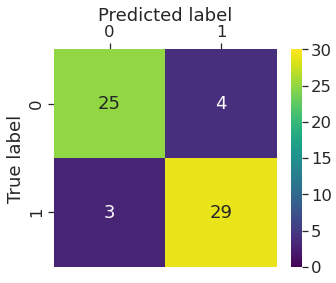

In [49]:
sns.set(font_scale=1.5)

def plot_confusion_matrix(y_test, y_preds):
    '''
    Visualises and plots an the sklearn confusion matrix using Seaborn's heatmap().
    '''
    # Plot confusion matrix as heatmap.
    fig, ax = plt.subplots(figsize=(5, 4))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),  
                     annot=True, # Annotate the boxes with the conf_mat values.
                     cbar=True, # Draw colour bar.
                     vmin=0, 
                     vmax=30,
                     cmap='viridis')
    # Customise the plot (x-axis).
    plt.xlabel('Predicted label')
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    # Customise the plot (y-axis).
    plt.ylabel('True label')
    ax.yaxis.set_ticks_position('left')
    
    # Disable seaborn styling so rest of notebook uses Matplotlib default styling
    sns.reset_orig()
    
    plt.show()


plot_confusion_matrix(y_test, y_preds)

##### Understanding the confusion matrix.

The current logistic regression model correctly predicted heart disease for 54 data samples, in which it predicted:
* 25 **true negatives**.
* 29 **true positives**.

The current logistic regression model incorrectly predicted heart disease (i.e. was confused) for 7 data samples, in which the model predicted
* 4 **false positives**.
* 3 **false negatives**.

#### Classification report.

* **Precision** indicates the proportion of positive classifications (i.e. the model predicted class 1) that were actually correct. A model that produces no false positives has a precision of 1.0.


$$\text{Precision} = \frac{\text{No. true positives}}{\text{No. true positives} + \text{No. false positives}}$$


* **Recall** indicates the proportion actual positives that were correctly classified. A model that produces no false negatives has a recall of 1.0.


$$\text{Recall} = \frac{\text{No. true positives}}{\text{No. true positives} + \text{No. false negatives}}$$


* **F1-score** is a combination of precision and recall. A perfect model achieves an F1-score of 1.0.

$$\text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$


* **Support** is the number of samples each metric was calculated on.


* **Accuracy** is the (default) cross-validation score of the model as a decimal probability. Perfect accuracy is 1.0.


* **Macro average** (`macro avg`) is the average precision, recall and F1 score between classes. The macro average does not class imbalance into effort, so if you do have class imbalances, pay attention to this metric.


* **Weighted average** (`weighted avg`) is the weighted average precision, recall and F1 score between classes. This metric is calculated with respect to how many samples are in each class. This metric favours the highest majority class (e.g. give a high value when one class outperforms another due to having more samples).

In [50]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



The classification report only provides the precision, recall and f1-score for a single train and test split (since we only split the dataset into two mutually exclusive train and test sets once and we trained the model on the training set and scored it on the test set once).

A more reliable way of assessing the classifier is to find the $k$-fold cross-validated accuracy, precision, recall and f1-score so that we can test the classifier on $k$ different mutually exclusive splits of the dataset into train and test sets.

#### Cross-validated evaluation metrics using `cross_val_score()`.

* Accuracy.
* Precision.
* Recall.
* F1-score.

In [51]:
# Best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [52]:
# Create a new classifier using the best hyperparameters
clf = LogisticRegression(C=0.20433597178569418, 
                         solver='liblinear')

##### Cross-validated accuracy.

In [53]:
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [54]:
cv_acc.mean()

0.8446994535519124

##### Cross-validated precision.

In [55]:
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [56]:
cv_precision.mean()

0.8207936507936507

##### Cross-validation recall.

In [57]:
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [58]:
cv_recall.mean()

0.9212121212121213

##### Cross-validated f1-score.

In [59]:
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [60]:
cv_f1.mean()

0.8673007976269721

#### Visualised cross-validated evaluation metrics.

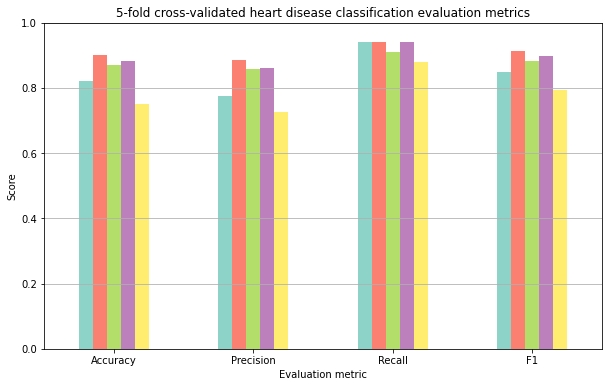

In [61]:
cv_metrics = pd.DataFrame({
    'Accuracy': cv_acc, 
    'Precision': cv_precision, 
    'Recall': cv_recall,
    'F1': cv_f1
}, index=[0, 1, 2, 3, 4])

cv_metrics.T.plot.bar(title='5-fold cross-validated heart disease classification evaluation metrics', 
                      legend=False, 
                      figsize=(10,6), 
                      cmap='Set3')
plt.xlabel('Evaluation metric')
plt.xticks(rotation=0)
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y')

The bar graph plotted above shows the cross-validated accuracy, precision, recall and f1-scores of the same logistic regression classifier `clf` but on 5 different splits of the heart disease dataset with `test_size=1/5`.

### Feature importance.

Feature importance is another way of asking which features of the heart disease dataset influenced the model the most and how those features contributed.

I will now determine what features were important to the current logistic regression classifier.

In [62]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [63]:
# Fit a new Logistic Regression model using the best hyperparameters.
clf = LogisticRegression(C=0.20433597178569418, 
                         solver='liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
# Check clf's (feature) coefficients.
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

The feature coefficients help in determining which features are important to the regression model's classification process.

In [65]:
# Match the column names to the feature coefficients.
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

In [66]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003167,-0.860446,0.660671,-0.01157,-0.001664,0.043861,0.312758,0.024594,-0.60413,-0.568629,0.450516,-0.636099,-0.676634


(-1.0, 0.8)

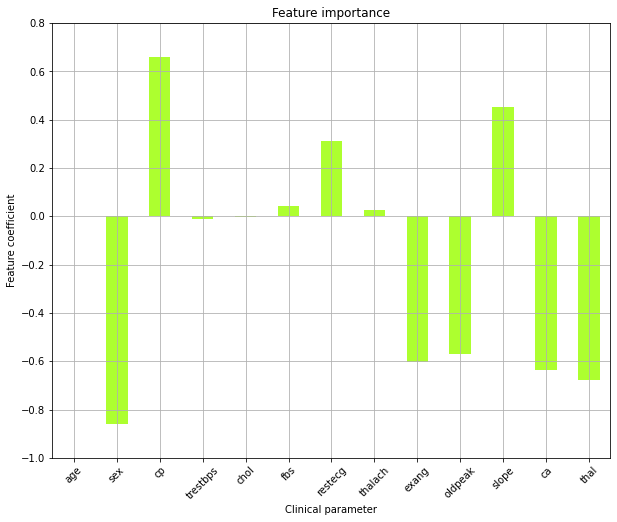

In [67]:
# Visualise feature importance.
feature_df.T.plot.bar(figsize=(10, 8), 
                      legend=False, 
                      color='greenyellow')

# Customising the feature importance plot.
plt.title('Feature importance')
plt.grid()
plt.xlabel('Clinical parameter')
plt.xticks(rotation=45)
plt.ylabel('Feature coefficient')
plt.ylim(-1, 0.8)

#### Model-driven exploratory data analysis.

Observations from the feature importance bar graph:

* Age, resting blood pressure, cholesterol, fasting blood sugar and maximum heart rate achievable has little to no effect on the model's heart disease classification since their coefficients are relatively close to zero, i.e. these clinical parameters have little to no correlation with `target`, therefore have little to no importance in determining heart disease. We now know that if we want pursue a similar project, then age, resting blood pressure, cholestorol, fasting blood sugar and maximum heart rate achievable do not necessarily have to be collected. This would let us consume less time and focus on only recording potentially important data.

* Sex has a very negative coefficient and is clearly the clinical parameter with the most importance in the regression model's decision making process. Sex appears to be strongly negatively correlated with the presence of heart disease, i.e. the higher the `sex` value, the lower the `target` value, therefore the lower the risk of heart disease. We can see from the cross-tabulation of the `sex` and `target` columns, as the `sex` value increases, the probability of the presence of heart disease (`target` = 1) decreases. This suggests that males are more likely to get heart disease than women.

$$P(\text{Heart disease in males}) = P(\text{target}=1 \land \text{sex}=0) = \frac{72}{72 + 24} = 0.75$$

$$P(\text{Heart disease in females}) = P(\text{target}=1 \land \text{sex}=1) = \frac{93}{93 + 114} = 0.45 \ \text{(2 d.p.)}$$

In [68]:
 pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [69]:
# TODO
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [70]:
# TODO
pd.crosstab(df['exang'], df['target'])

target,0,1
exang,,
0,62,142
1,76,23


Recall:

`slope`: Slope of the peak exercise ST segment.
* 0: Upsloping (better heart rate with exercise - uncommon).
* 1: Flatsloping (minimal change - typical for healthy hearts).
* 2: Downsloping (signals an unhealthy heart).

In [71]:
# TODO
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation.

The current logistic regression model has not hit the evaluation metric of achieving at least 95% accuracy. What can I do now?
* Could I collect more data?
* Is there a better model to try? Like CatBoost or XGBoost?
* Could I improve the current models beyond what I have done so far?


# DO A WIDER SEARCH RANGE ON LOGISTIC REGRESSION AND RANDOM FOREST CLASSIFIER
# RESEARCH MORE MODEL HYPERPARAMETERS
# EXPORTING AND SHARING TRAINED MODELS